# Libraries 

In [1]:
# imports

# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Data 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [6]:
print(test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

# EDA 

## Taget Distribution

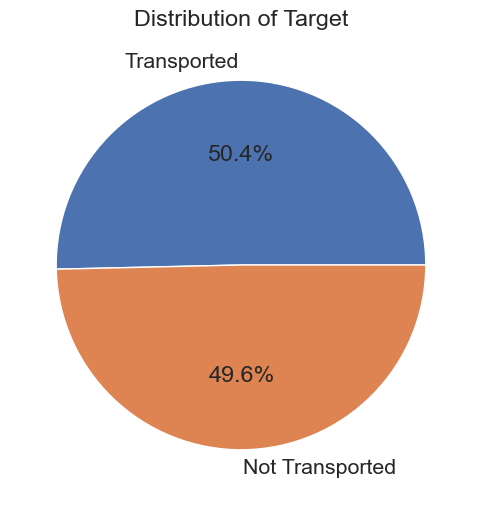

In [98]:
# Plot Target Distribution 
plt.figure(figsize=(6,6))
plt.pie(train['Transported'].value_counts(), autopct='%1.1f%%', labels=['Transported', 'Not Transported'])
plt.title('Distribution of Target')
plt.show()

## Age Feature 

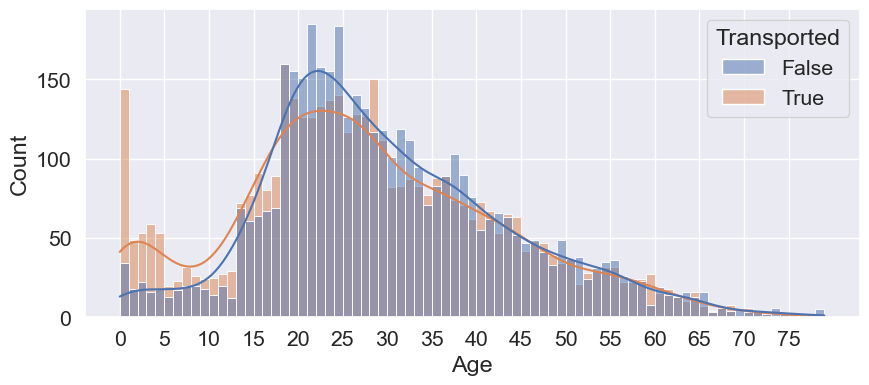

In [40]:
# Plot passengers age and their transported status 
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age', hue='Transported', kde=True, binwidth=1)
plt.xticks(ticks=range(0, int(train['Age'].max()) + 1, 5)) # add more tick marks on x axis for more clarity  
plt.show()

- 0-18 yo are more likely to be transported 
- 18-34 yo are less likely to be transported
- 34+ yo are about equally likely to be transported   

## Other Features

### Expenditure Features

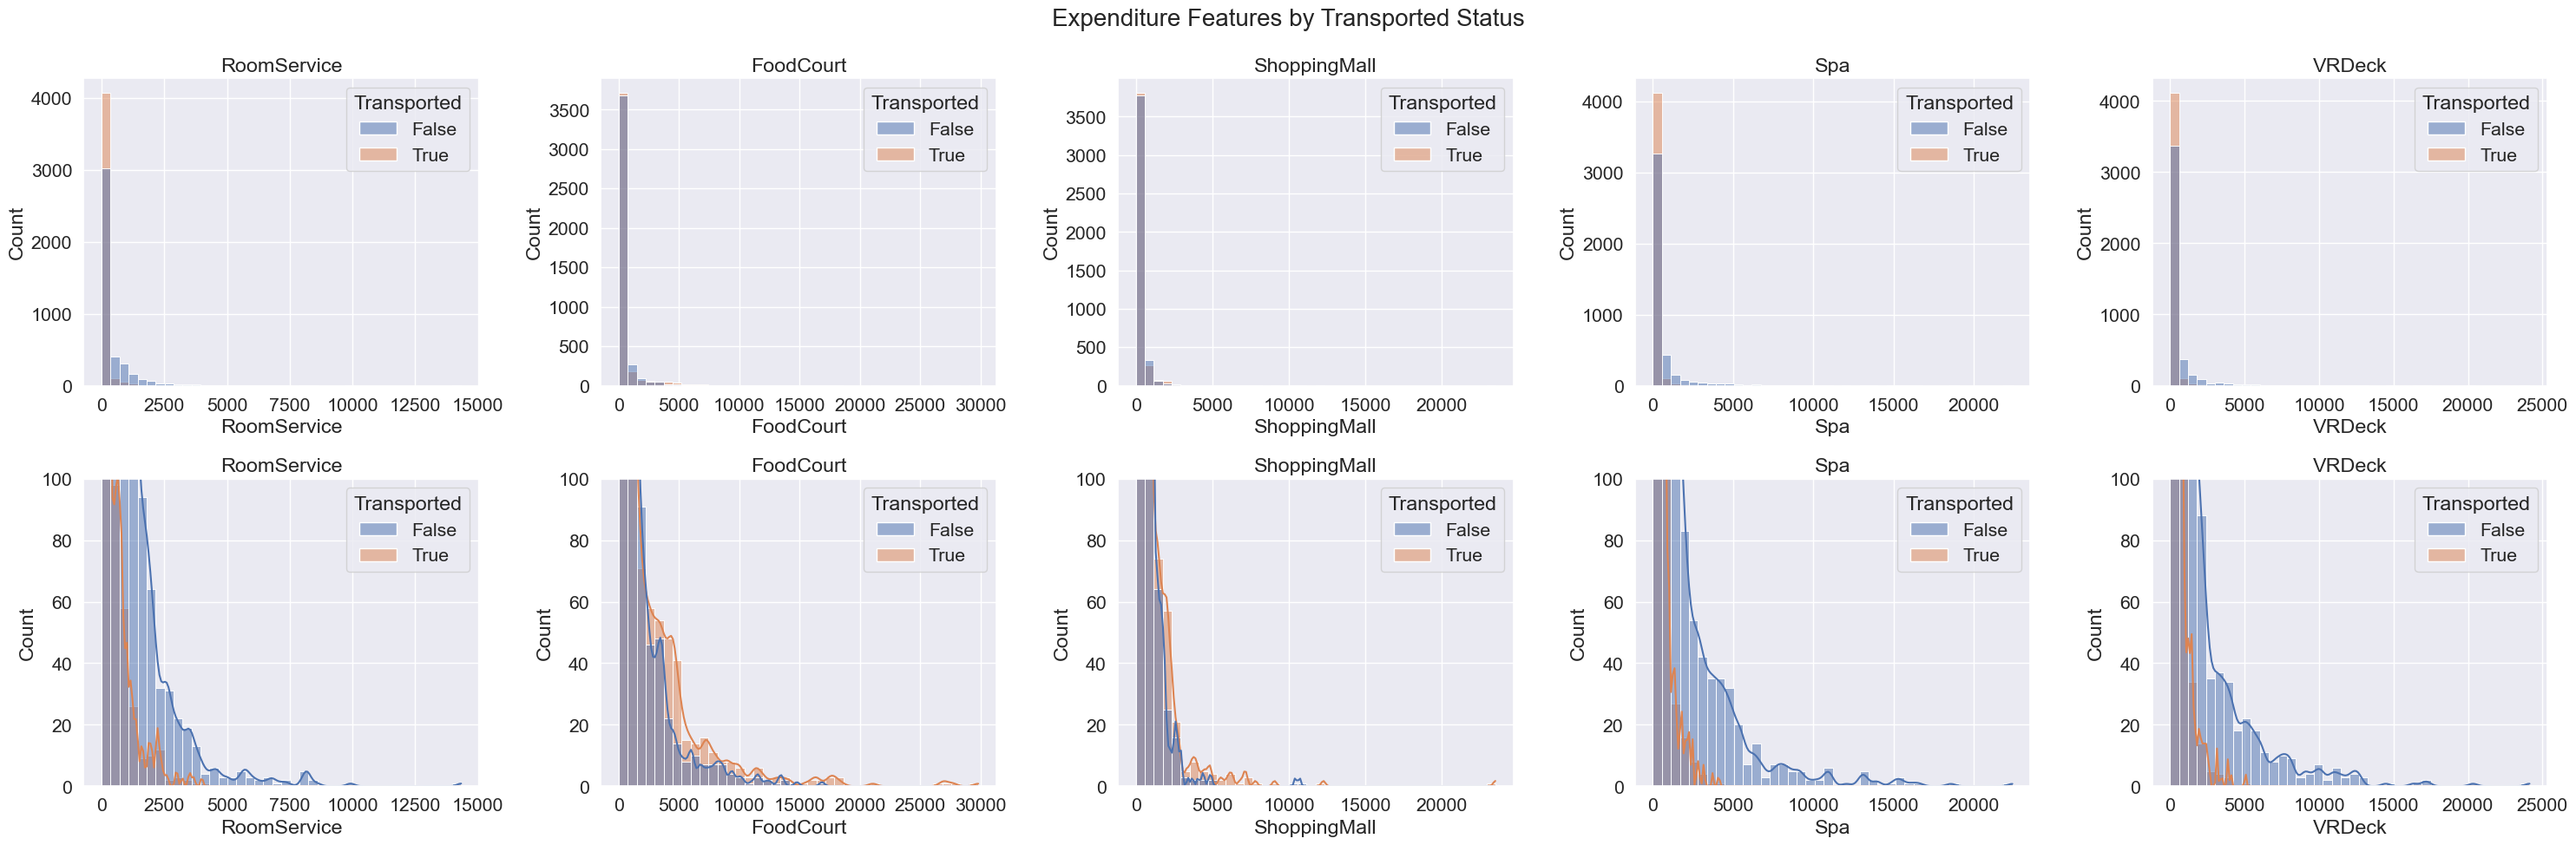

In [74]:
# Expenditure Features
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot the Features 
fig = plt.figure(figsize=(30, 10))
fig.suptitle("Expenditure Features by Transported Status", fontsize=20)
for i, featurename in enumerate(features):
    # Top row plots: Histogram without KDE
    ax = fig.add_subplot(2, 5, i + 1)
    sns.histplot(data=train, x=featurename, hue='Transported', ax=ax, bins=40)
    ax.set_title(featurename)

    # Bottom row plots: Histogram with KDE
    ax = fig.add_subplot(2, 5, i + 6)
    sns.histplot(data=train, x=featurename, hue='Transported', ax=ax, bins=40, kde=True)
    plt.ylim([0,100])
    ax.set_title(featurename)
fig.tight_layout()  
plt.show()


- Most people do not spend money
- Heavily skewed to the right, meaning most people spend very little 
- Those who spent money on Room service, Spa and VR Deck were less likely to be transported   

### Categorical Features

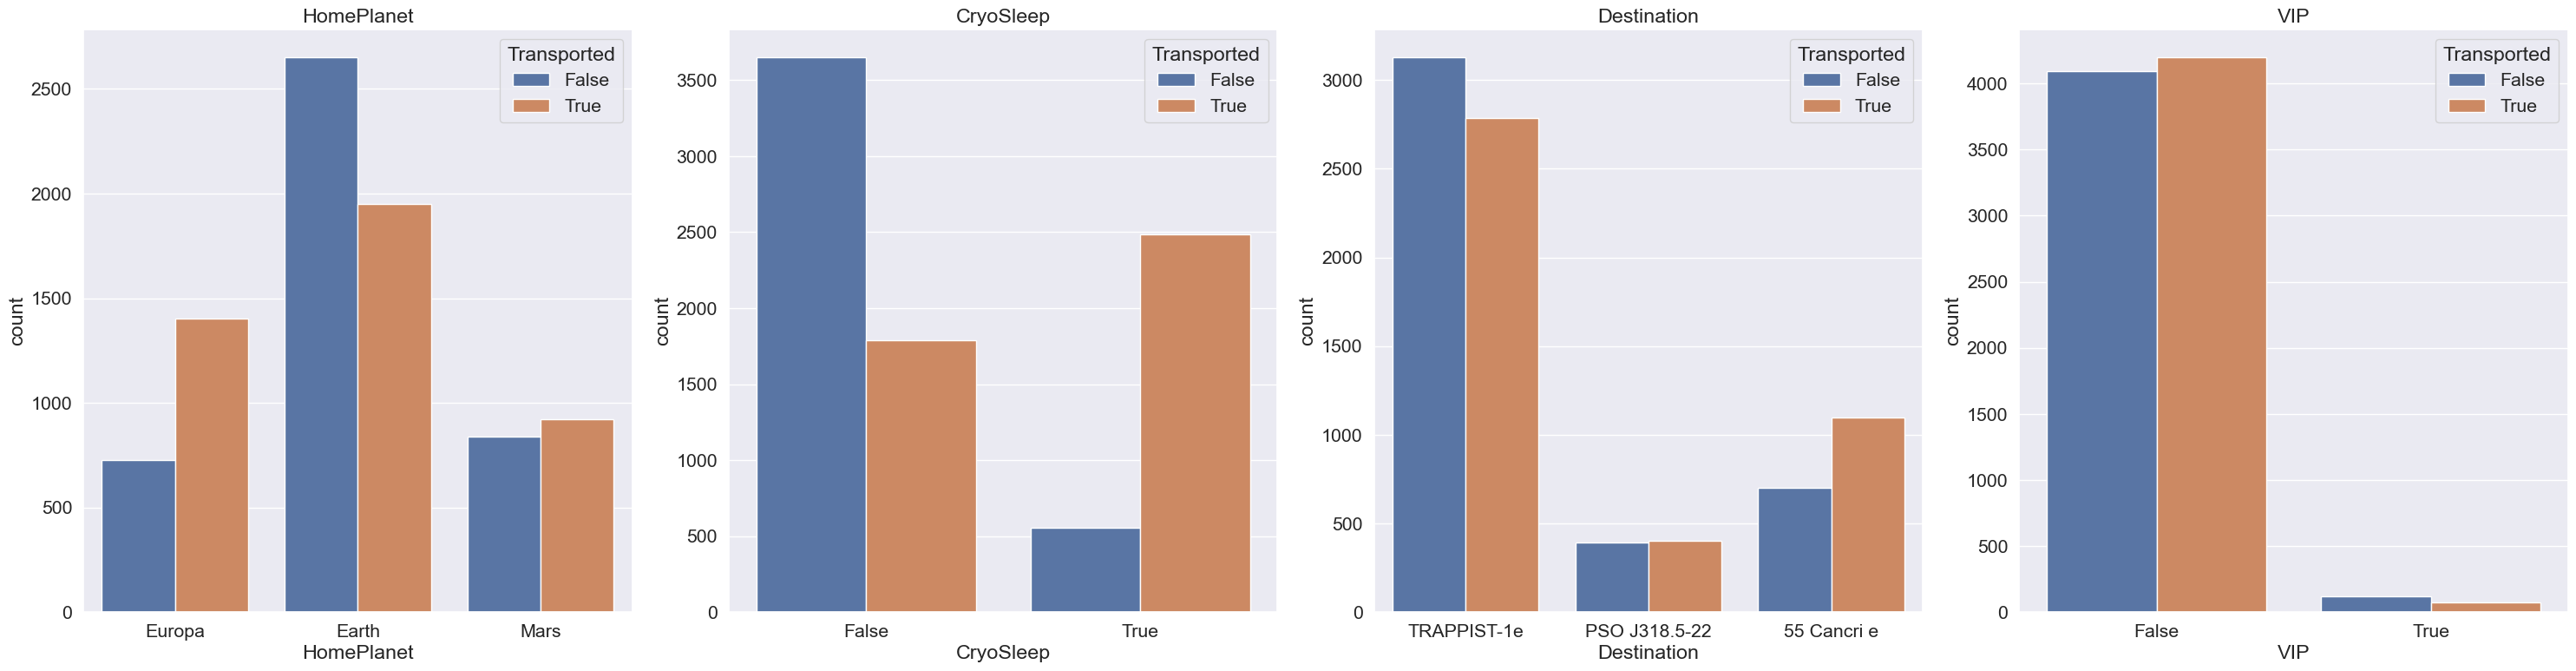

In [89]:
# Categorical features 
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot the features 
fig = plt.figure(figsize=(30,15))
for i, featurename in enumerate(cat_features):
    ax = fig.add_subplot(2, 4, i + 1)
    sns.countplot(data=train, x=featurename, ax=ax, hue='Transported')
    ax.set_title(featurename)
fig.tight_layout()
plt.show()

- Home Planet and Cryo Sleep seems to be statistically important features
- Destination feature has some relevancy it seems
- VIP feature seems unimportant

### Qualitative Features

In [100]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
train[qual_feats].head(20)

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
5,0005_01,F/0/P,Sandie Hinetthews
6,0006_01,F/2/S,Billex Jacostaffey
7,0006_02,G/0/S,Candra Jacostaffey
8,0007_01,F/3/S,Andona Beston
9,0008_01,B/1/P,Erraiam Flatic


- PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
- Cabin takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Notes:
- We can extract the group and group size from the PassengerId feature.
- We can extract the deck, number and side from the cabin feature.
- We could extract the surname from the name feature to identify families.

# Feature Engineering